# **PROYECTO** Calibración de Cámara 

## 0. Preparación

In [15]:
import cv2
print("OpenCV should be 4.8.0.76 Current version:", cv2.__version__)
from typing import List
import numpy as np
import imageio
import cv2
import copy
import glob

OpenCV should be 4.8.0.76 Current version: 4.8.0


## *Calibración de cámara*

### **Tarea A.1:** Defina y ejecute el método para cargar imágenes ``load_images()``.

In [16]:
def load_images(filenames: List) -> List:
    return [imageio.imread(filename) for filename in filenames]

In [17]:
# TODO Build a list containing the paths of all images from the left camera

# Ruta hacia las imágenes de la cámara izquierda 
imgs_path = sorted(glob.glob("../data/ajedrez/*.jpeg"))

imgs = load_images(imgs_path)

print(f"{len(imgs)} imágenes cargadas desde la carpeta 'ajedrez'.") #comprobamos que estan las 19 imagnes: OK

C:\Users\lucia\AppData\Local\Temp\ipykernel_31708\283608422.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  return [imageio.imread(filename) for filename in filenames]


41 imágenes cargadas desde la carpeta 'ajedrez'.


### **Tarea A.2:** Detecte las esquinas de los patrones usando ``cv2.findChessboardCorners()``. Refine las detecciones con ``cv2.cornerSubPix()``.

In [18]:
# TODO Find corners with cv2.findChessboardCorners()
corners = [cv2.findChessboardCorners(i, (9,6)) for i in imgs]

In [19]:
corners

[(True,
  array([[[782.3822 , 573.8124 ]],
  
         [[718.0046 , 553.7244 ]],
  
         [[653.42365, 532.27   ]],
  
         [[586.34064, 509.51013]],
  
         [[519.0984 , 485.23444]],
  
         [[448.13577, 460.30072]],
  
         [[376.11172, 434.36484]],
  
         [[300.86435, 407.3945 ]],
  
         [[223.14343, 378.2286 ]],
  
         [[788.3003 , 510.05508]],
  
         [[728.549  , 490.09842]],
  
         [[666.7437 , 467.37946]],
  
         [[604.90704, 444.59515]],
  
         [[540.05096, 422.62448]],
  
         [[473.78   , 398.04718]],
  
         [[406.0075 , 373.6088 ]],
  
         [[334.7411 , 348.44165]],
  
         [[263.22598, 320.57013]],
  
         [[794.98425, 454.0666 ]],
  
         [[737.56   , 431.573  ]],
  
         [[679.3514 , 411.20114]],
  
         [[619.7628 , 388.44556]],
  
         [[558.90625, 366.02866]],
  
         [[496.6678 , 342.9864 ]],
  
         [[431.8502 , 319.46075]],
  
         [[365.4012 , 294.50558]],
  
    

In [20]:
corners_copy = copy.deepcopy(corners)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.01)

# TODO To refine corner detections with cv2.cornerSubPix() you need to input grayscale images. Build a list containing grayscale images.
imgs_gray = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in imgs]

corners_refined = [cv2.cornerSubPix(i, cor[1], (9,6), (-1, -1), criteria) if cor[0] else [] for i, cor in zip(imgs_gray, corners_copy)]

In [21]:
print(corners_refined)

[array([[[782.5217 , 574.1884 ]],

       [[718.2371 , 553.3693 ]],

       [[653.2136 , 531.2936 ]],

       [[586.80334, 508.68506]],

       [[518.9792 , 485.0151 ]],

       [[448.57077, 460.28665]],

       [[376.0703 , 434.4413 ]],

       [[300.72168, 407.26   ]],

       [[222.98059, 378.47006]],

       [[788.52045, 510.34537]],

       [[728.4607 , 489.47092]],

       [[667.0673 , 467.28003]],

       [[604.6782 , 444.74643]],

       [[540.3446 , 422.02676]],

       [[473.77277, 398.22318]],

       [[405.57178, 373.77185]],

       [[335.08575, 348.1215 ]],

       [[262.56015, 321.0222 ]],

       [[794.992  , 452.98984]],

       [[737.4239 , 431.74777]],

       [[679.3172 , 410.34296]],

       [[619.8368 , 388.41977]],

       [[558.96875, 366.0156 ]],

       [[496.54028, 342.79813]],

       [[431.82355, 319.3827 ]],

       [[365.39053, 294.55908]],

       [[297.4814 , 269.20905]],

       [[799.70184, 400.73193]],

       [[745.56384, 379.78098]],

       [[690.

### **Tarea A.3:** Compruebe que las detecciones son correctas dibujando los resultados con ``cv2.drawChessboardCorners()``

In [22]:
imgs_copy = copy.deepcopy(imgs)

In [23]:
# TODO Use cv2.drawChessboardCorners() to draw the cornes

# We are going to draw the corners if we have found them
tmp = [cv2.drawChessboardCorners(img, (9,6), cor[1], cor[0]) for img, cor in zip(imgs_copy, corners) if cor[0]]

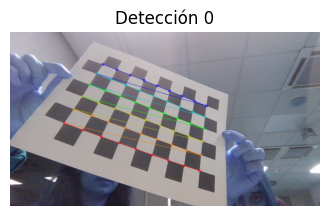

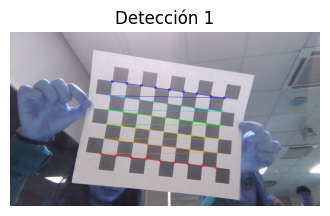

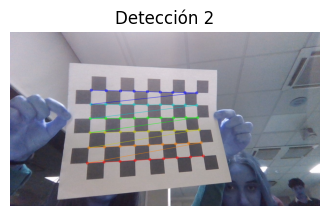

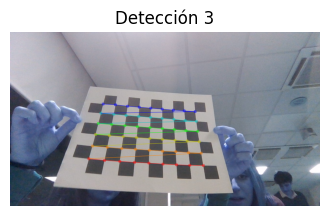

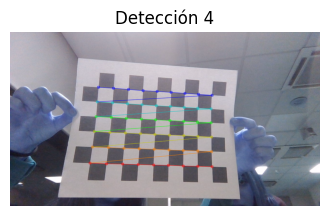

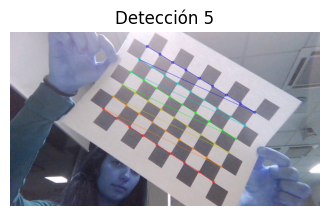

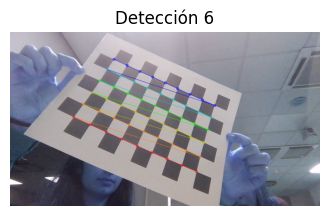

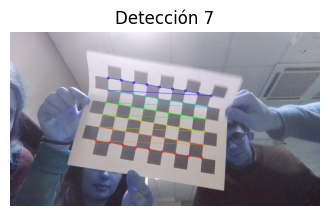

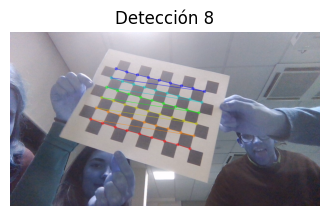

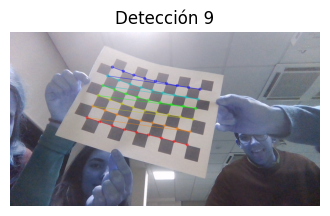

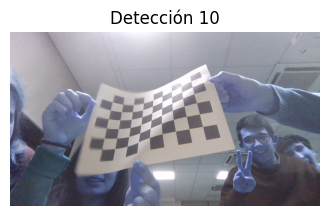

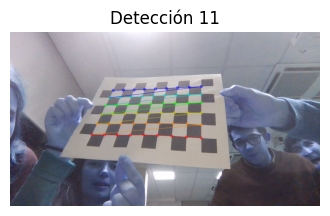

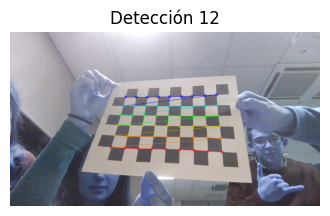

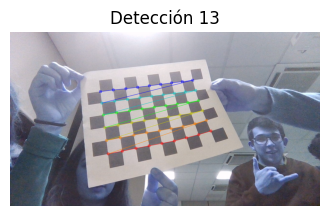

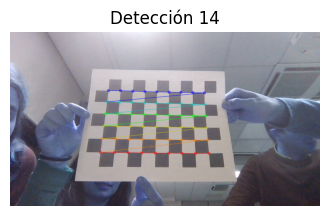

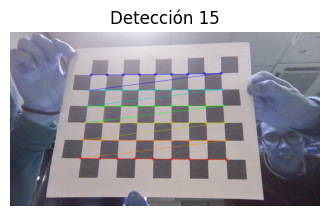

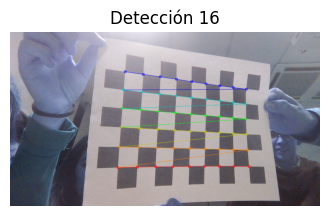

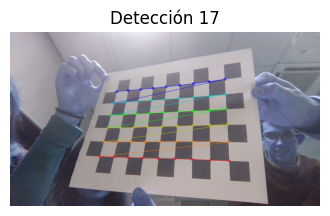

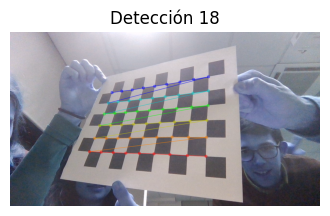

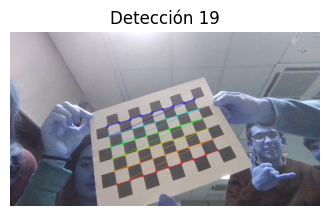

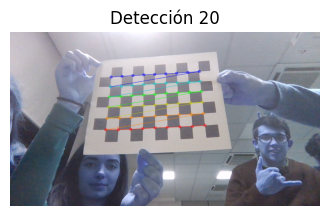

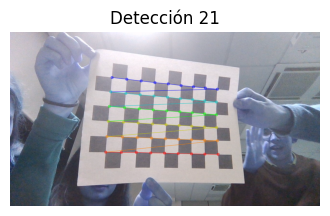

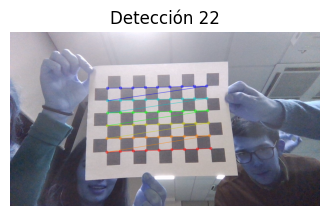

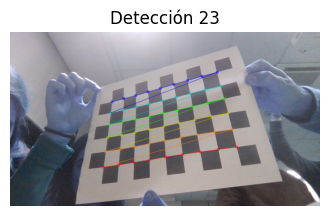

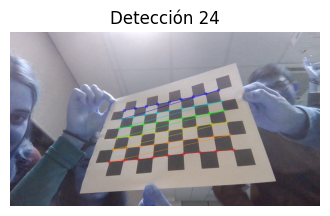

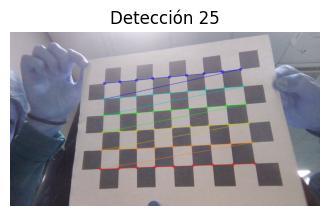

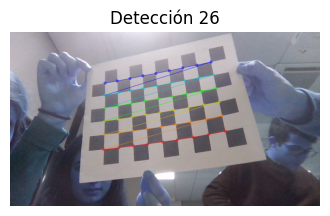

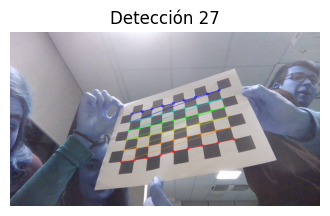

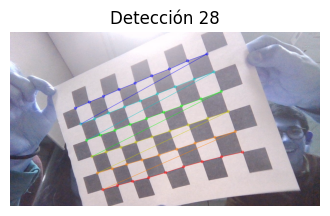

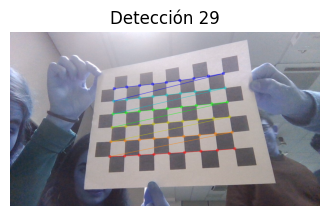

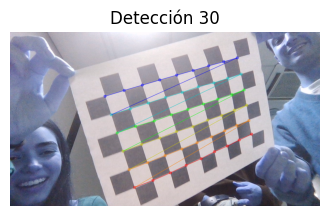

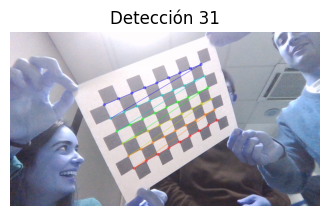

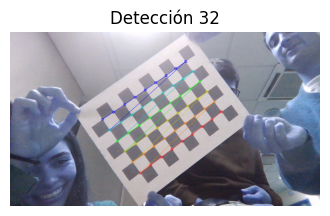

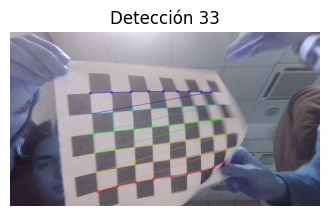

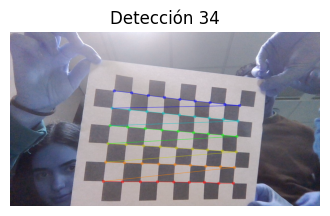

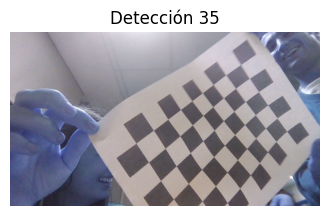

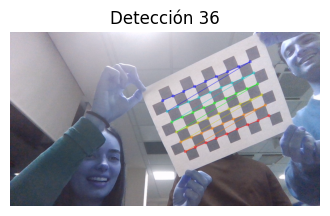

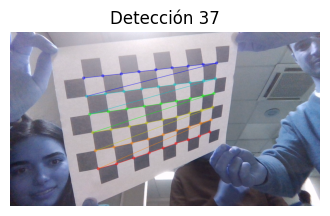

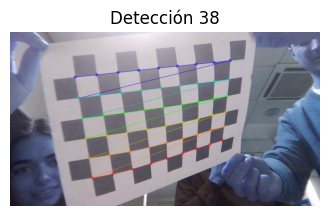

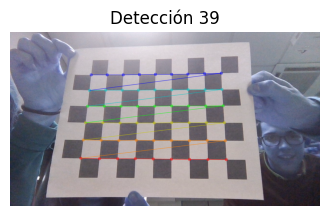

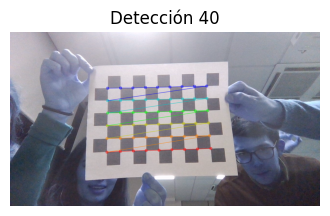

In [24]:
import matplotlib.pyplot as plt

# TODO Show images and save when needed

def show_image():
    cv2.imshow()
    cv2.waitKey()
    cv2.destroyAllWindows()
    
def write_image():
    cv2.imwrite()


for i in range(len(imgs_copy)):  #para ver todas cambiariamos 3 por len(imgs_copy), mostramos solo 3
    plt.figure(figsize=(4,4))
    plt.imshow(cv2.cvtColor(imgs_copy[i], cv2.COLOR_BGR2RGB))
    plt.title(f"Detección {i}")
    plt.axis('off')
    plt.show()


### **Tarea A.4:** Defina y ejecute el método ``get_chessboard_points(chessboard_shape, dx, dy)``

In [25]:
# TODO Design the method. It should return a np.array with np.float32 elements


def get_chessboard_points(chessboard_shape, dx, dy):
    return [[(i%chessboard_shape[0])*dx, (i//chessboard_shape[0])*dy, 0] for i in range(np.prod(chessboard_shape))]


In [26]:
# TODO You need the points for every image, not just one (consider a list comprehension)
chessboard_points = get_chessboard_points((9,6), 30, 30)

### **Tarea A.5:** Utilice ``cv2.calibrateCamera()`` para obtener los parámetros de calibración para la cámara izquierda

In [27]:
# Filter data and get only those with adequate detections
valid_corners = [cor[1] for cor in corners if cor[0]]
# Convert list to numpy array
valid_corners = np.asarray(valid_corners, dtype=np.float32)

In [28]:
# TODO
# Matrix with the coordinates of the corners
realpts = get_chessboard_points((9,6), 30, 30)
objectpts = np.asarray([realpts for i in range(len(valid_corners))], dtype=np.float32)

#calibramos
rms, intrinsics, dist_coeffs, rvecs, tvecs = cv2.calibrateCamera(objectpts, valid_corners, imgs[1].shape[0:2], None, None)
extrinsics = list(map(lambda rvec, tvec: np.hstack((cv2.Rodrigues(rvec)[0], tvec)), rvecs, tvecs))

#guardamos
np.savez('calib_left', intrinsic=intrinsics, extrinsic=extrinsics)

In [29]:
# Print outputs
print("Intrinsics:\n", intrinsics)
print("Distortion coefficients:\n", dist_coeffs)
print("Root mean squared reprojection error:\n", rms)

Intrinsics:
 [[851.09792811   0.         496.3082453 ]
 [  0.         824.72695001 337.64549556]
 [  0.           0.           1.        ]]
Distortion coefficients:
 [[-0.16626935  0.82529379  0.00386685 -0.06644165 -0.88137497]]
Root mean squared reprojection error:
 3.356730076413496
